# Introduction
## Part 2 

---


**The FVC2002 fingerprint dataset is a fingerprint verification competition dataset which was organized back in 2000 and then again in 2002. This dataset consists of four different sensor fingerprints which are low cost optical sensors, low cost capacitive sensor and optical sensor , and modular generator, each sensor has different image sizes.**

**This project is the second part of a project to reconstruct fingerprint images using Autoencoder Neural Network.
You can find the first version in the following link : [HERE](https://github.com/aly202012/Basic-Projects-in-Keras-Functonal-API/blob/master/Reconstruct%20fingerprints%20using%20Autoencoder.ipynb)**

**This is the second code in the project: The goal of this code is to improve the results of the neural network, or in other words, to improve the structure of the Autoencoder's neural network, and by the way the results are very good.**

**I will focus in this code on improving the structure and showing better results, and I have been exposed to more explanations of the code that I am building.**

**By the way, the new network structure, I built it before, but it showed bad results, but I solved that problem by entering the regularizers and padding because this is what was missing, so the results were a little bad, and in addition to that, I made some modifications to the structure that I learned from books And studying a lot of network structures, so that would be very nice.**

**Let's continue working.**

**Before I forgot about this code, I explained parts of Autoencoder's neural network, which went deeper into the commentary and had only a simplified explanation.**

**I will also delete data perceptions because they occupy a large area of code, so if you need to look at data perceptions and manipulate images (fingerprints) and other things you can see the first part of the code which you will find that I have attached his link at the top.**

> **Now I'll let Python do the talking**

# Optimizing the Autoencoder Neural Network Structure

![Fingerprints](https://th.bing.com/th/id/R.a2494cb537e6be746f8b8c1856794308?rik=H89oNh%2b6enfyrA&pid=ImgRaw&r=0)

In [27]:
Agenda = {
    1:"Importing what I want",
    2:"Loading our data",
    3:"Some Transformation",
    4:"Data splitting",
    5:"Add noise to the data",
    6:"Implementation Code of Advanced Autoencoder",
    7:"Saving the weights",
    8:"Showing the resalts"
}

Agenda

{1: 'Importing what I want',
 2: 'Loading our data',
 3: 'Some Transformation',
 4: 'Data splitting',
 5: 'Add noise to the data',
 6: 'Implementation Code of Advanced Autoencoder',
 7: 'Saving the weights',
 8: 'Showing the resalts'}

## 1. Importing what I want

In [28]:
# importing some basic lib
import cv2
from glob import glob
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# importing for building the model
from keras import Sequential
from keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D,Input,Dropout,add

## 2. Loading our data

In [29]:
data_image = glob('../input/fvc2002-fingerprints/fingerprints/DB*/*')
images = []
from matplotlib.pyplot import imread

def readImages(data_image):
    for i in range(len(data_image)):
        img = cv2.imread(data_image[i])
        img = cv2.resize(img,(128,128))
        images.append(img)
        
    return images

In [30]:
images = readImages(data_image)

## 3. Some Transformation

In [31]:
# Convert the data type to float32 array so that it is easy to perform operations on it.
images_arr = np.asarray(images)
images_arr = images_arr.astype('float32')
images_arr.shape

(320, 128, 128, 3)

**Let's convert images to grayscale so that it is easy to manipulate.**

In [32]:
images_arr = images_arr.reshape(-1, 128,128, 1)
images_arr.shape

(960, 128, 128, 1)

In [33]:
print('Max value ',np.max(images_arr))
print('Min value ',np.min(images_arr))

Max value  255.0
Min value  0.0


In [34]:
images_arr = images_arr / np.max(images_arr)
images_arr.shape

(960, 128, 128, 1)

# 4. Data splitting

In [35]:
train_X, valid_X, train_ground, valid_ground = train_test_split(images_arr,images_arr,test_size=0.1,random_state=44)

In [36]:
print('shape of train_X        :' , train_X.shape)
print('shape of valid_X        :' , valid_X.shape)
print('shape of train_ground   :' , train_ground.shape)
print('shape of valid_ground   :' , valid_ground.shape)

shape of train_X        : (864, 128, 128, 1)
shape of valid_X        : (96, 128, 128, 1)
shape of train_ground   : (864, 128, 128, 1)
shape of valid_ground   : (96, 128, 128, 1)


**Important note: I did not prepare the labels and I will not use them here, because the nature of the application does not require that, and therefore I skipped it.**

# 5. Add noise to the data

**This is if we want to test the Autoencoders in removing / eliminating noise from images.**

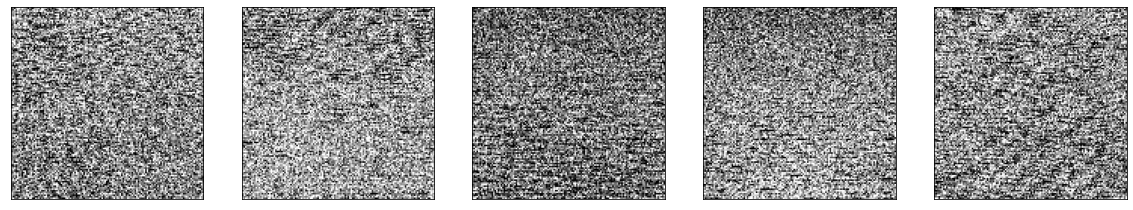

In [37]:
noise_factor = 0.3
x_train_noise = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape) 
valid_X_noise = valid_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=valid_X.shape) 
train_ground_noise = train_ground + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_ground.shape) 
valid_ground_noise = valid_ground + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=valid_ground.shape) 
x_train_noise = np.clip(x_train_noise, 0., 1.)
valid_X_noise = np.clip(valid_X_noise, 0., 1.)
train_ground_noise = np.clip(train_ground_noise, 0., 1.)
valid_ground_noise = np.clip(valid_ground_noise, 0., 1.)

# Here is how the noisy images look right now.
plt.figure(figsize=(20, 8))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(valid_X_noise[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

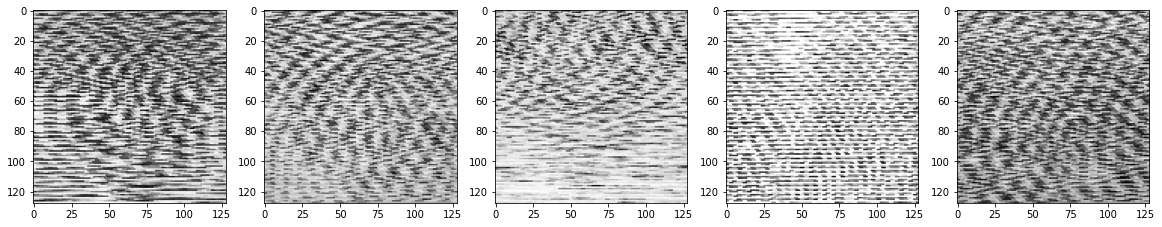

In [38]:
# Original images without noise

plt.figure(figsize=(20, 8))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(train_X[i])
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

In [39]:
# plot and compare between images
def plot_noise_imagea(x_train, x_train_noise, seed = int):
    if seed:
        random.seed(seed)
    
    # original image
    random_image_x_train = random.choice(x_train)
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    ax[0].imshow(random_image_x_train)
    ax[0].set_title(f"Original Image \nSize: {random_image_x_train.shape}")
    ax[0].axis(False)
            
    # noisy image
    random_image_x_train_noise = random.choice(x_train_noise)
    ax[1].imshow(random_image_x_train_noise)
    ax[1].set_title(f"Noised Image \nSize: {random_image_x_train_noise.shape}")
    ax[1].axis("off")
                    

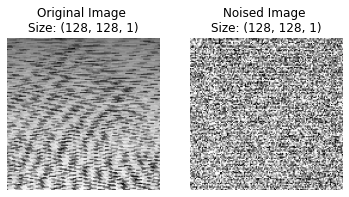

In [40]:
# calling the function 
plot_noise_imagea(x_train = train_X,  # original image 
                 x_train_noise = x_train_noise # noisy image 
                 )

## 6. Implementation Code of Advanced Autoencoder

**An autoencoder is actually an Artificial Neural Network that is used to decompress and compress the input data provided in an unsupervised manner. Decompression and compression operations are lossy and data-specific.**

**Autoencoders are a neural network architecture that attempts to find a compressed representation of the given input data.**

![Autoencoders image](https://lh4.googleusercontent.com/wUjH7L2Roehxgaan3TWeemEoUIXMeK7A1Zx_x_UHkAsesLyVcqOpka2YXK-sBkgAzJ61dvseRD-HDrpBindbXIB2XaDR_htXrwzFqtdTBQrcheJkMupCEh3Jo63iR1P69gm2D0P-)

**There are three popular types of Autoencoders:**

* **Simple autoencoder.**

* **Deep CNN autoencoder.**

* **Denoising autoencoder.**

> **I will test each of these types and record the results.**


## 6.1 Building the Structure of the model

In [41]:
# starting the model with simplest way (sequential method)

model = Sequential([
    
    # encoder part
    Conv2D(32, 3,   activation = "relu", padding = "same", input_shape = (128, 128, 1)),
    MaxPooling2D(2, padding = "same"),
    Conv2D(16, 3,   activation = "relu", padding = "same"),
    MaxPooling2D(2, padding = "same"),
    
    # decoder part
    Conv2D(16, 3,   activation = "relu", padding = "same"),
    UpSampling2D(2),
    Conv2D(32, 3,   activation = "sigmoid", padding = "same"),
    UpSampling2D(2),
    
    # output layer
    Conv2D(1, 3,    activation = "sigmoid", padding = "same")
    
    
])

model.compile(optimizer = "adam", loss = "binary_crossentropy");

In [42]:
# complete the model with functional API method in keras

input_img = Input(shape = (128, 128, 1))  # input layer 
l1 = Conv2D(64, (3,3), padding = "same", activation = "relu", activity_regularizer = regularizers.l1(10e-10))(input_img)
l2 = Conv2D(64, (3,3), padding = "same", activation = "relu", activity_regularizer = regularizers.l1(10e-10))(l1)
l3 = MaxPooling2D(padding = "same")(l2)

l4 = Conv2D(128, (3,3), padding = "same", activation = "relu", activity_regularizer = regularizers.l1(10e-10))(l3)
l5 = Conv2D(128, (3,3), padding = "same", activation = "relu", activity_regularizer = regularizers.l1(10e-10))(l4)
l6 = MaxPooling2D(padding = "same")(l5)

l7 = Conv2D(256, (3,3), padding = "same", activation = "relu", activity_regularizer = regularizers.l1(10e-10))(l6)

l8 = UpSampling2D()(l7)
l9 = Conv2D(128, (3,3), padding = "same", activation = "relu", activity_regularizer = regularizers.l1(10e-10))(l8)
l10 = Conv2D(128, (3,3), padding = "same", activation = "relu", activity_regularizer = regularizers.l1(10e-10))(l9)
l11 = add([l10, l5])  # the first concatenation point

l12 = UpSampling2D()(l11)
l13 = Conv2D(64, (3,3), padding = "same", activation = "relu", activity_regularizer = regularizers.l1(10e-10))(l12)
l14 = Conv2D(64, (3,3), padding = "same", activation = "relu", activity_regularizer = regularizers.l1(10e-10))(l13)
l15 = add([l14,l2])    # the second concatenation point

decoder = Conv2D(1, (3,3), padding = "same", activation = "relu", activity_regularizer = regularizers.l1(10e-10))(l15)

autoencoder = Model(input_img, decoder)
autoencoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 128, 128, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 128, 128, 64) 36928       conv2d_15[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 64, 64, 64)   0           conv2d_16[0][0]                  
____________________________________________________________________________________________

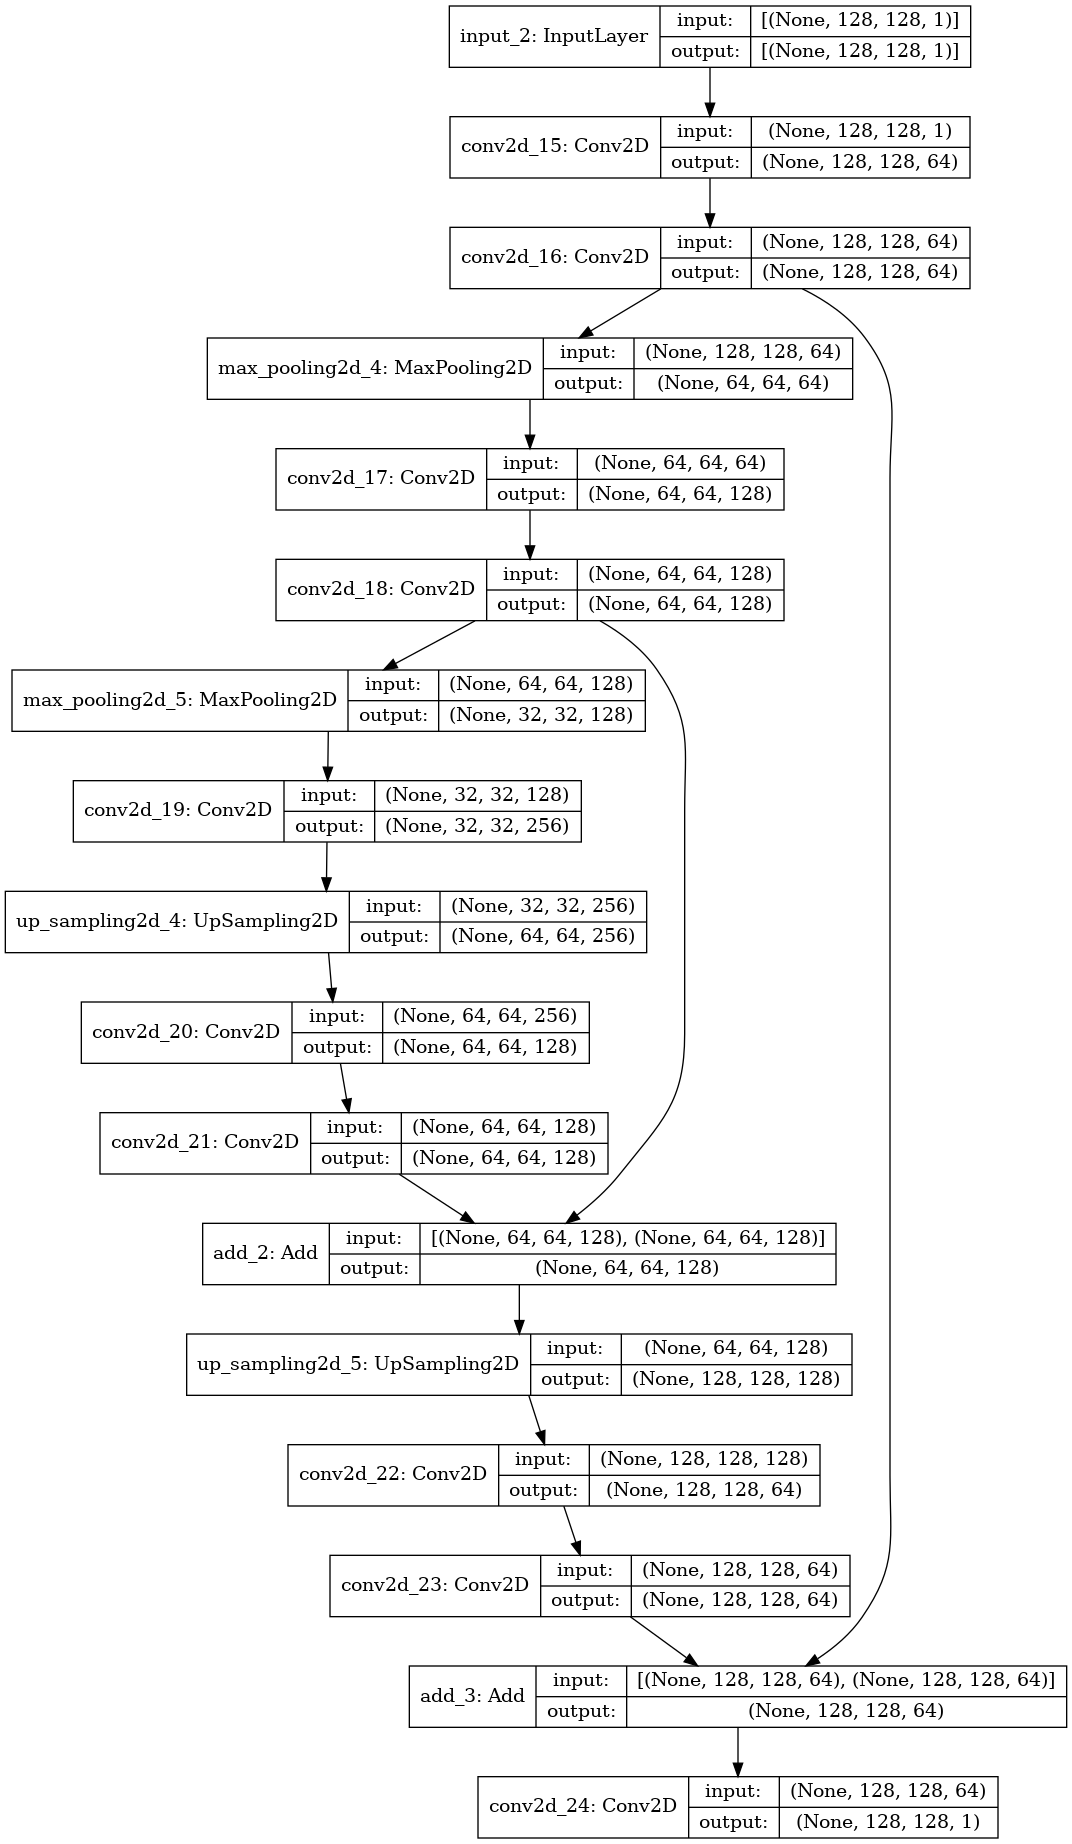

In [43]:
plot_model(autoencoder, to_file = "second_version.png", show_shapes = True)

In [44]:
autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [45]:
# early sropping 
early_stopping = EarlyStopping(monitor = "val_loss", min_delta = 0.01, patience = 3, verbose = 1, mode = "min")

## 6.2 Training the model

In [46]:
history = autoencoder.fit(train_X, train_ground,epochs = 300, batch_size = 128, validation_data = (valid_X, valid_ground), callbacks = [early_stopping])

2022-09-18 08:03:02.796948: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2022-09-18 08:03:05.660886: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


7/7 [==============================] - 22s 1s/step - loss: 3.7666 - accuracy: 5.4225e-04 - val_loss: 0.6309 - val_accuracy: 7.2098e-04
Epoch 2/300
7/7 [==============================] - 4s 541ms/step - loss: 0.6497 - accuracy: 0.0010 - val_loss: 0.5998 - val_accuracy: 6.3133e-04
Epoch 3/300
7/7 [==============================] - 4s 539ms/step - loss: 0.5886 - accuracy: 9.8299e-04 - val_loss: 0.5966 - val_accuracy: 7.2098e-04
Epoch 4/300
7/7 [==============================] - 4s 542ms/step - loss: 0.5770 - accuracy: 0.0010 - val_loss: 0.5900 - val_accuracy: 7.2098e-04
Epoch 5/300
7/7 [==============================] - 4s 539ms/step - loss: 0.5568 - accuracy: 0.0011 - val_loss: 0.5753 - val_accuracy: 7.2098e-04
Epoch 6/300
7/7 [==============================] - 4s 539ms/step - loss: 0.5462 - accuracy: 0.0011 - val_loss: 0.5696 - val_accuracy: 7.2098e-04
Epoch 7/300
7/7 [==============================] - 4s 540ms/step - loss: 0.5378 - accuracy: 0.0011 - val_loss: 0.5611 - val_accuracy: 7.

## 7. Saving the weights

In [47]:
autoencoder.save('Autoencoder_neural_network_model_second_version.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## 8. Showing the resalts

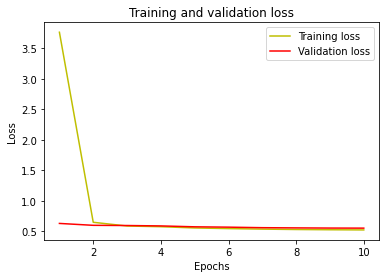

In [48]:
#plot the training and validation accuracy and loss at each epoch
history = history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Images


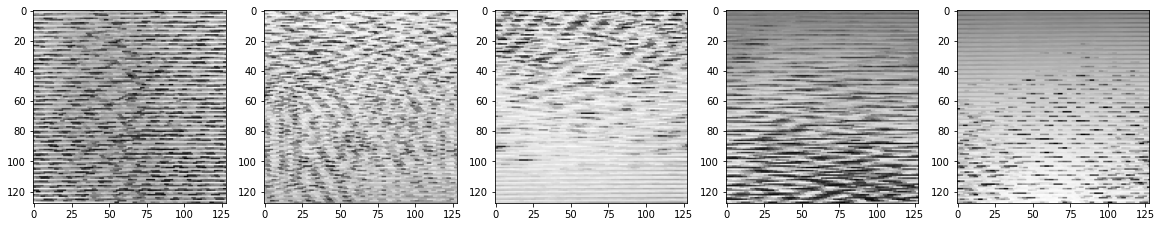

Reconstructing the Test Images


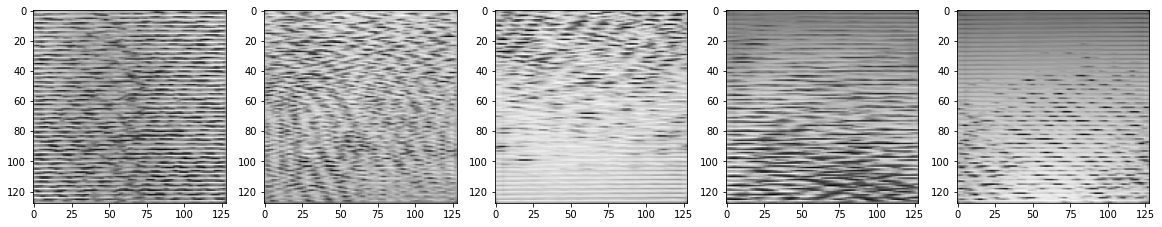

In [49]:
pred = autoencoder.predict(valid_X) # Reconstruction of Test Images
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(valid_ground[i, ..., 0], cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstructing the Test Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

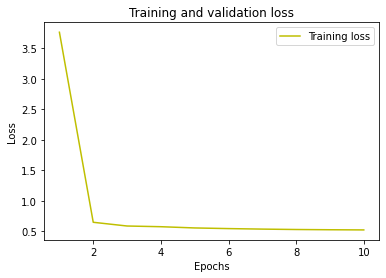

In [50]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

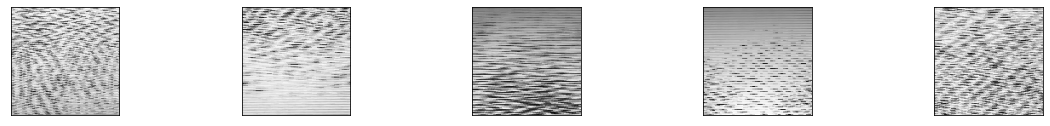

In [51]:
# Once again for clarification
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(valid_X[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

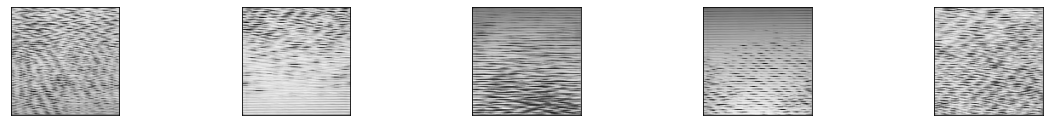

In [52]:
# Once again for clarification
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(pred[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**I won't go into too much describing what happened. Looking at the grid results, the test images, the blurred images, and the reconstructed images, we notice something really interesting.**

**The new neural network is very powerful, and that's exactly what I want.**

> **Thanks** 